In [7]:
from sklearn.linear_model import LogisticRegression

In [80]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [40]:
df.shape

(8124, 23)

In [81]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [42]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [58]:
df['class'].unique

<bound method Series.unique of 0       p
1       e
2       e
3       p
4       e
5       e
6       e
7       e
8       p
9       e
10      e
11      e
12      e
13      p
14      e
15      e
16      e
17      p
18      p
19      p
20      e
21      p
22      e
23      e
24      e
25      p
26      e
27      e
28      e
29      e
30      e
31      p
32      e
33      e
34      e
35      e
36      e
37      p
38      e
39      e
40      e
41      e
42      e
43      p
44      e
45      e
46      e
47      e
48      e
49      e
50      e
51      e
52      e
53      p
54      p
55      e
56      e
57      e
58      e
59      e
60      e
61      e
62      e
63      e
64      e
65      e
66      e
67      e
68      e
69      e
70      e
71      e
72      e
73      e
74      e
75      e
76      e
77      e
78      p
79      e
80      e
81      p
82      e
83      e
84      e
85      e
86      e
87      e
88      e
89      e
90      e
91      e
92      e
93      e
94      e
95      e
96      e

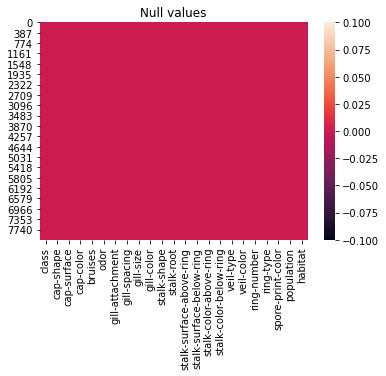

In [43]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

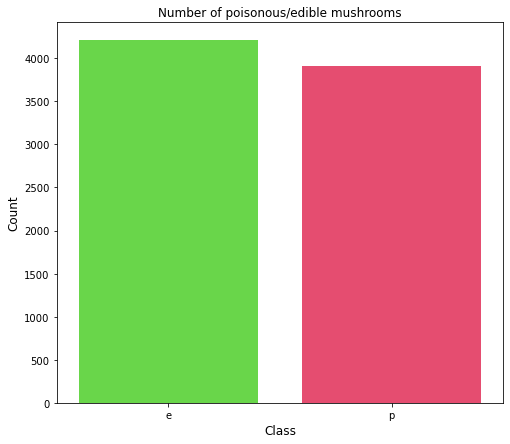

In [51]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<Figure size 1296x576 with 0 Axes>

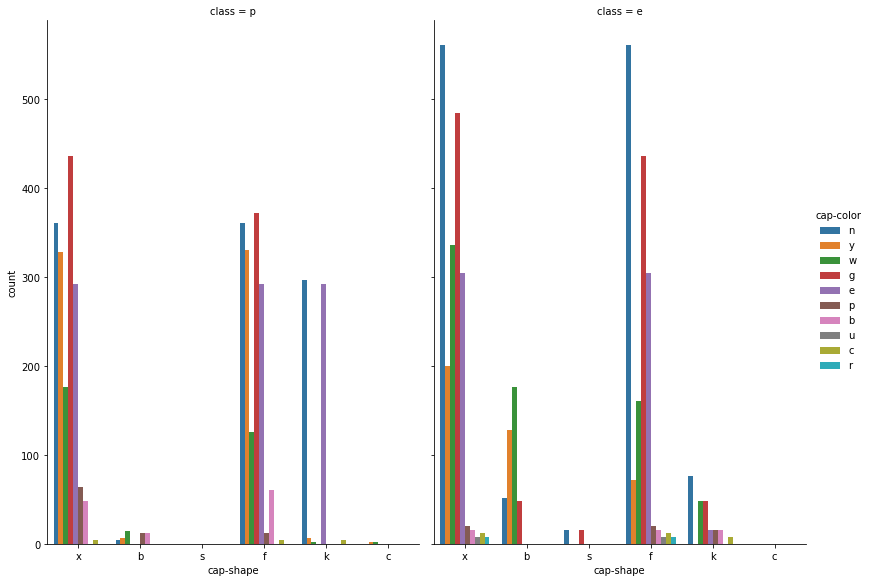

In [13]:
plt.figure(figsize = (18,8))
g = sns.catplot(x="cap-shape" , hue="cap-color" , col="class",
               data=df, kind="count",
               height=8, aspect=.7);

<Figure size 1440x648 with 0 Axes>

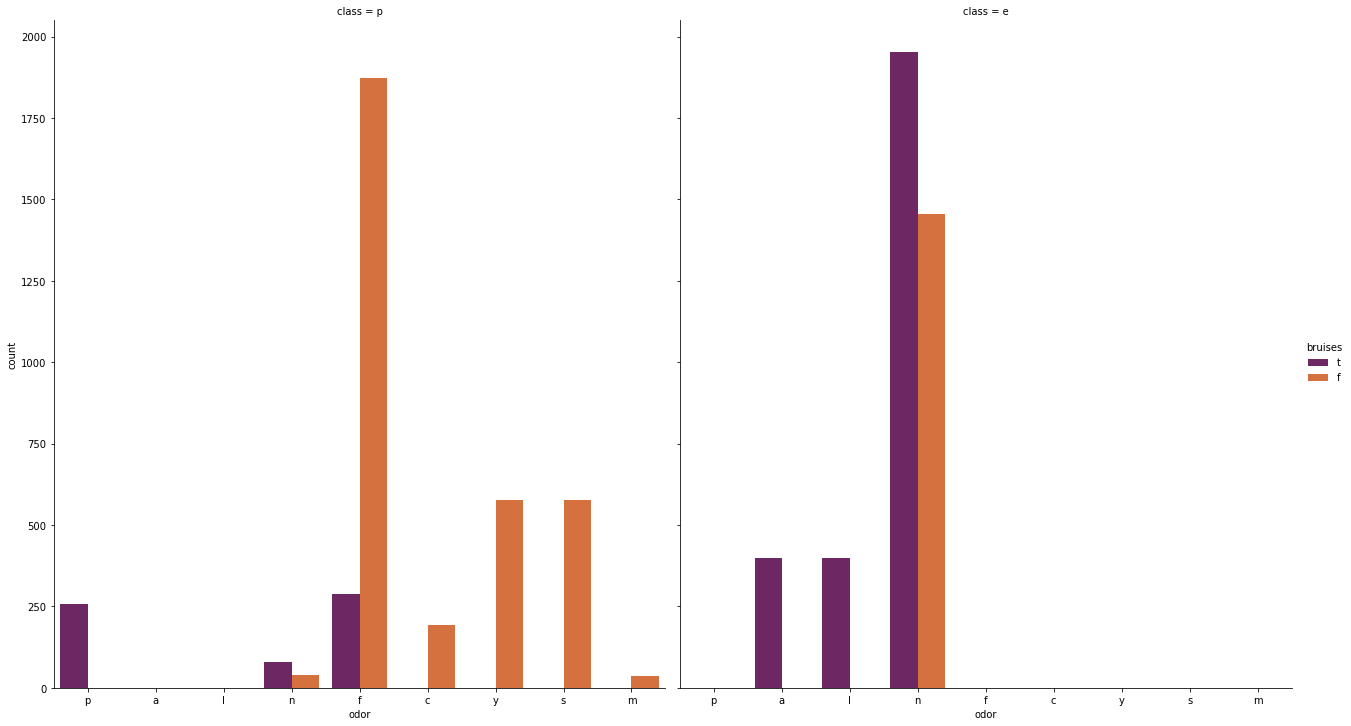

In [14]:
plt.figure(figsize = (20,9))
g = sns.catplot(x="odor",hue="bruises",col="class",
               data=df, kind="count",
               height=10, aspect=.9 , palette= 'inferno')

In [82]:
df = df.apply(LabelEncoder().fit_transform)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [16]:
print(df.corr())

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

<function matplotlib.pyplot.show(close=None, block=None)>

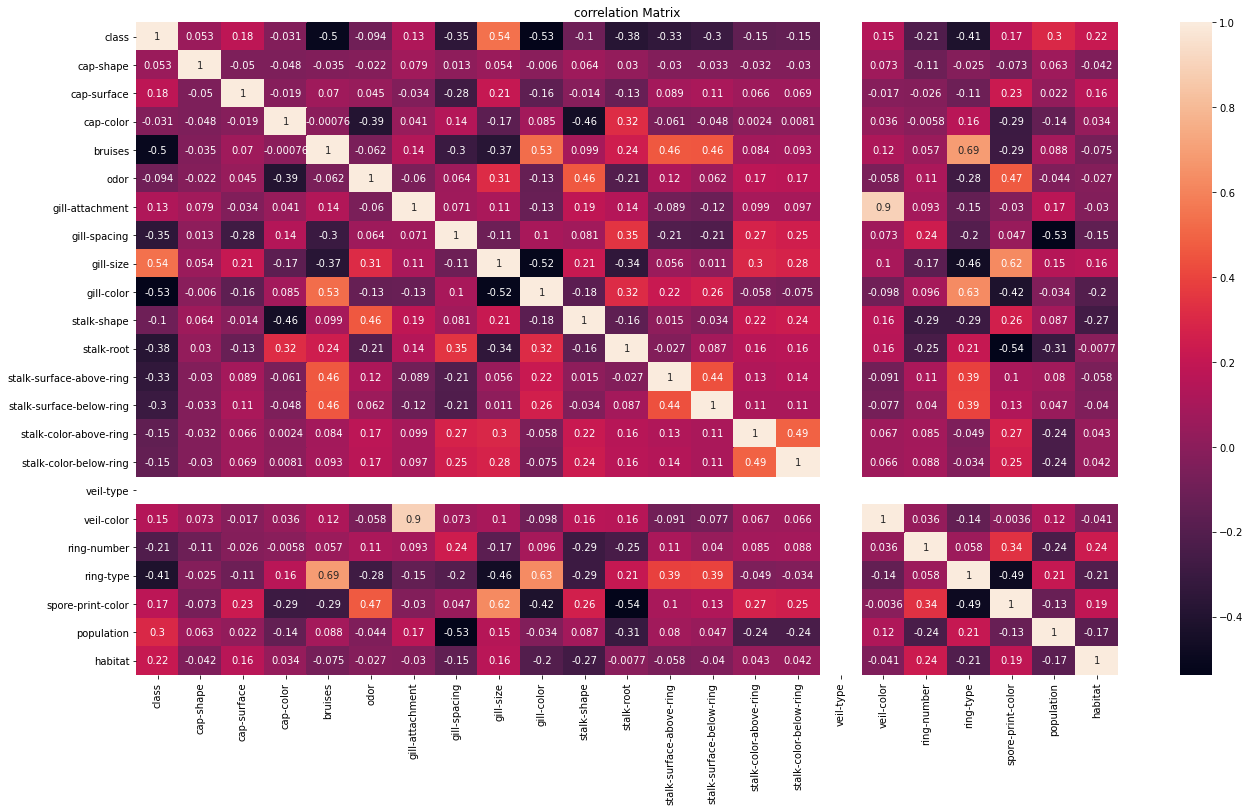

In [17]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

In [21]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

LinAlgError: singular matrix

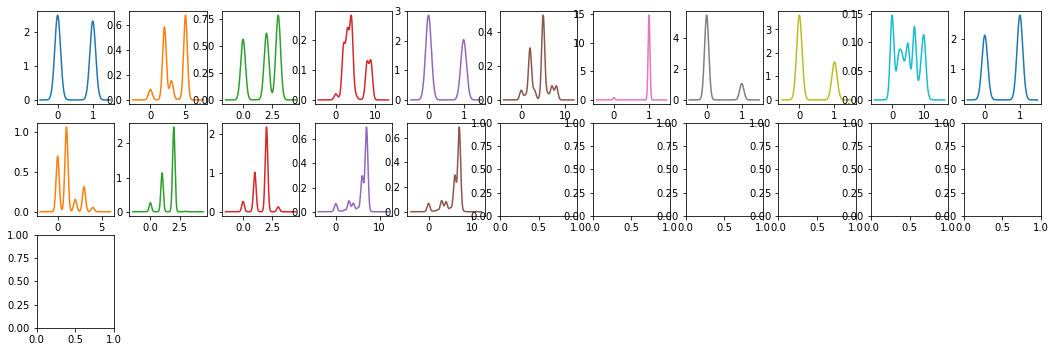

In [23]:
df.plot(kind='density' , subplots=True, layout=(6,11), sharex=False, fontsize=1, figsize=(18,12))
plt.show()

In [25]:
x= df.drop('class' ,axis=1)
y= df["class"]

In [27]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [28]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [43]:
x.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-type                   0.000000
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

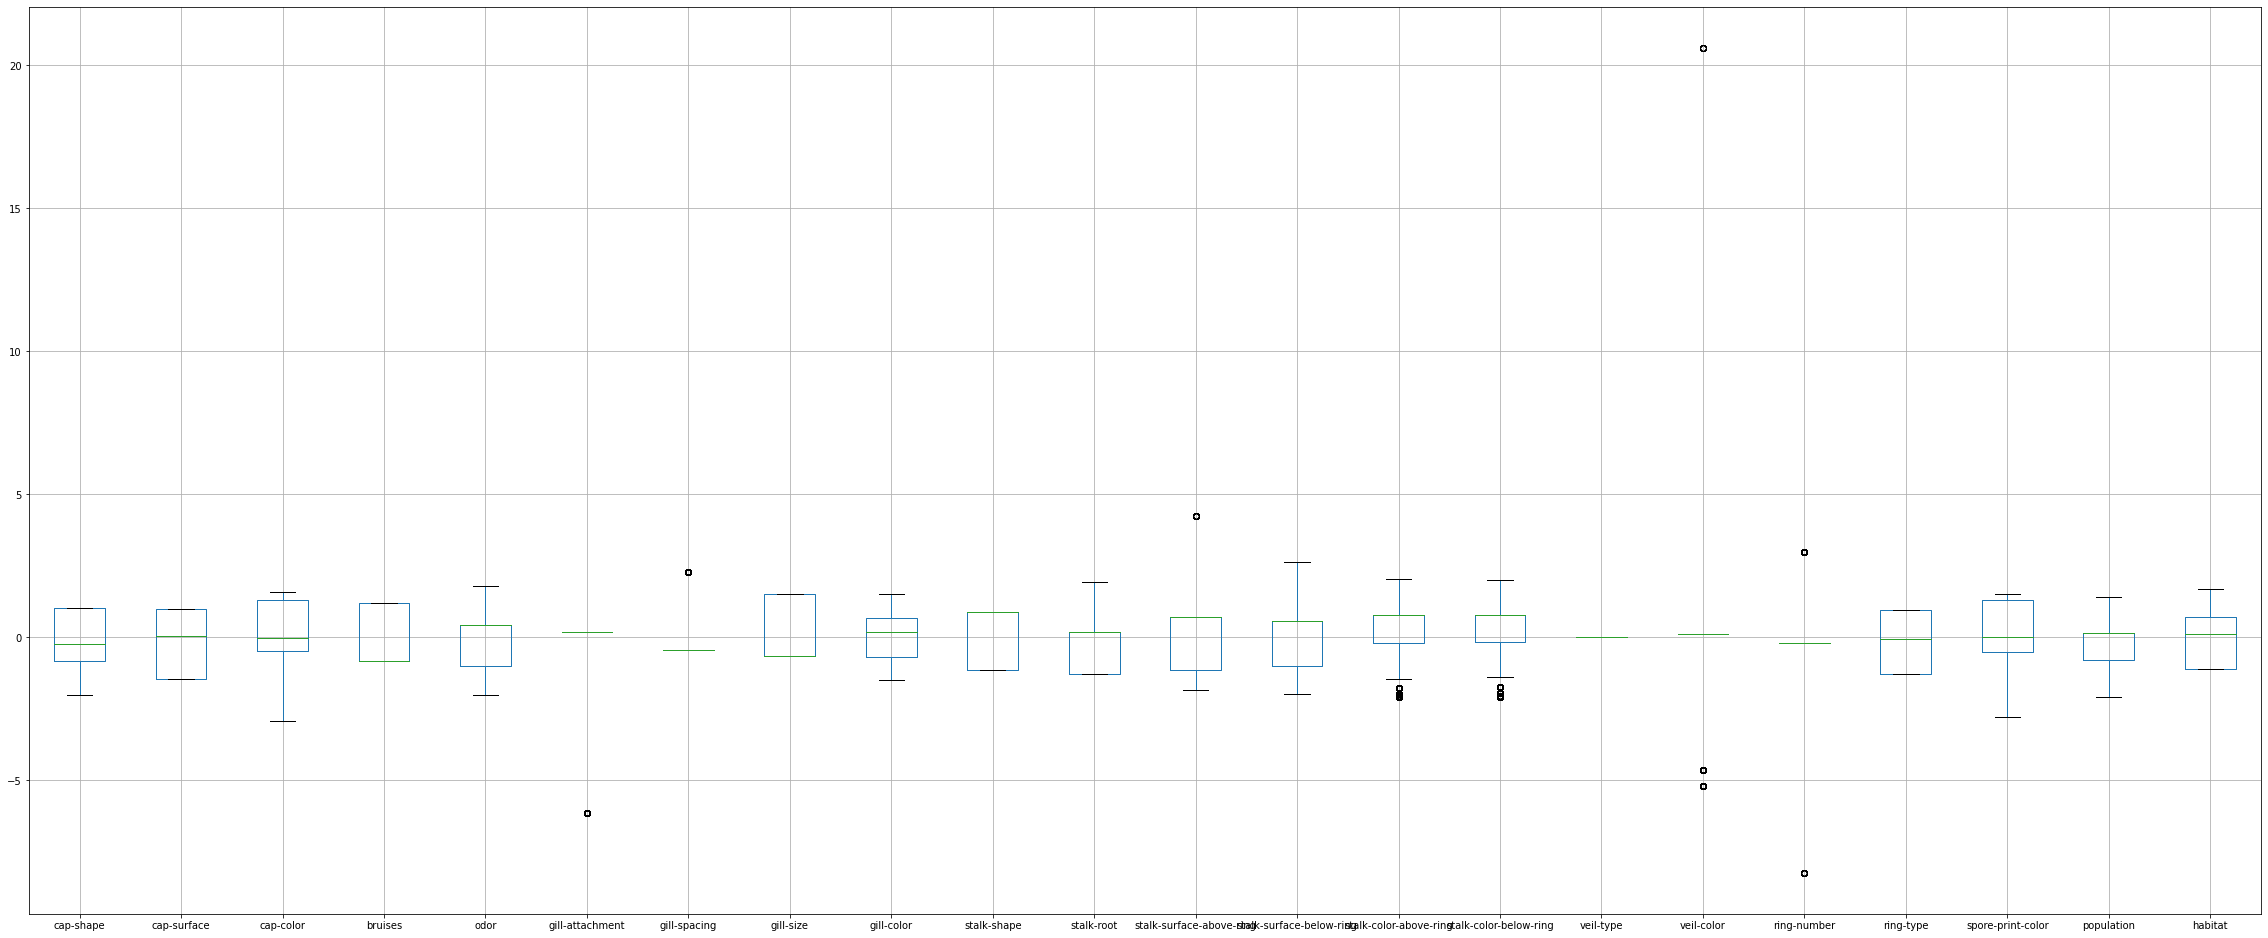

In [44]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)     

Best accuracy is 0.966789667896679 on Random_state 6


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 12)

In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 95.19999999999999
[[814  34]
 [ 44 733]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       848
           1       0.96      0.94      0.95       777

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 100.0
[[848   0]
 [  0 777]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 100.0
[[848   0]
 [  0 777]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 99.93846153846154
[[847   1]
 [  0 777]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [69]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.8181541492989769


In [70]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.8890588101553618


In [71]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.8638184918529745


In [72]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [75]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [76]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

1.0

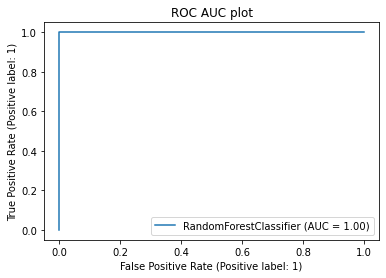

In [77]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [78]:
import joblib 
joblib.dump(GCV.best_estimator_,"MashroomModel.pkl")

['MashroomModel.pkl']